In [1]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from xdesign import *
from skimage.exposure import adjust_gamma, rescale_intensity


def rescale(reconstruction, hi):
    I = rescale_intensity(reconstruction, out_range=(0., 1.))
    return adjust_gamma(I, 1, hi)

/home/user/python/venvs/py373/lib/python3.7/site-packages/xdesign/phantom.py:368: RuntimeWarning: Reached termination criteria of 500 attempts before adding all of the circles.
  kTERM_CRIT), RuntimeWarning)


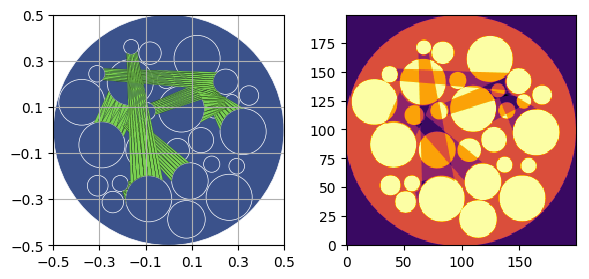

In [2]:
wet = WetCircles()
sidebyside(wet, size=200)
plt.savefig('Wet_sidebyside.png', dpi='figure',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.0,
        frameon=False)
plt.show(block=True)

In [3]:
#sx, sy = 100, 100
#sino, prb = sinogram(sx, sy, wet)
#wet.material = material.Material()
NPIXEL = 100
angles = np.linspace(0, np.pi, NPIXEL, endpoint=False),
positions = np.linspace(0, 1, NPIXEL, endpoint=False) - 0.5 + 1/NPIXEL/2
theta, h = np.meshgrid(angles, positions)
probe = Probe(size=1/NPIXEL)
sino = probe.measure(wet, theta, h)

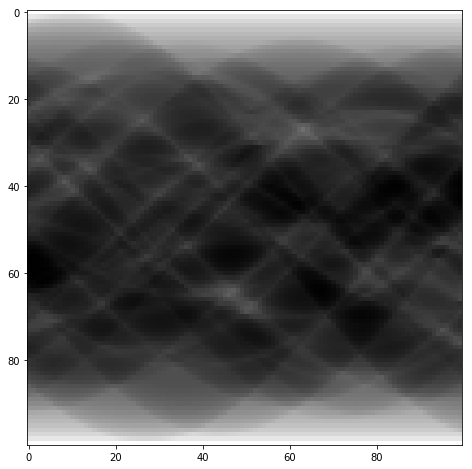

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(np.reshape(sino, (NPIXEL, NPIXEL)), cmap='gray', interpolation='nearest')
plt.show(block=True)

[##########] 100.00%
[##########] 100.00%
[##########] 100.00%


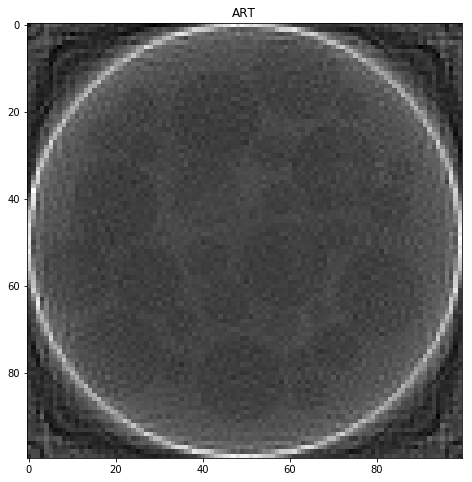

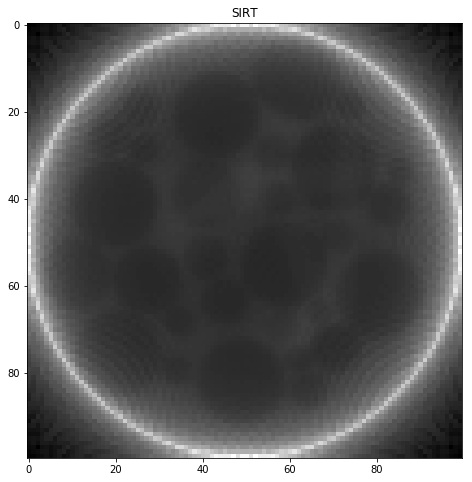

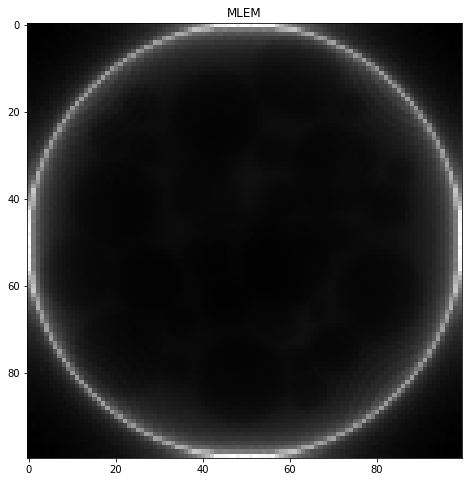

In [10]:
gmin = [-0.5, -0.5]
gsize = [1, 1]
hi = 1
niter = 20
# Reconstruct object.
init = 1e-12 * np.ones((NPIXEL, NPIXEL))
rec_art = art(gmin, gsize, sino, theta, h, init, niter)
rec_art = rescale(np.rot90(rec_art)[::-1], hi)
plt.figure(figsize=(8, 8))
plt.imshow(rec_art, cmap='gray', interpolation='none')
plt.title('ART')

init = 1e-12 * np.ones((NPIXEL, NPIXEL))
rec_sirt = sirt(gmin, gsize, sino, theta, h, init, niter)
rec_sirt = rescale(np.rot90(rec_sirt)[::-1], hi)
plt.figure(figsize=(8, 8))
plt.imshow(rec_sirt, cmap='gray', interpolation='none')
plt.title('SIRT')

init = 1e-12 * np.ones((NPIXEL, NPIXEL))
rec_mlem = mlem(gmin, gsize, sino, theta, h, init, niter)
rec_mlem = rescale(np.rot90(rec_mlem)[::-1], hi)
plt.figure(figsize=(8, 8))
plt.imshow(rec_mlem, cmap='gray', interpolation='none')
plt.title('MLEM')
plt.show()